In [1]:
%matplotlib inline

from fermi_model import * 

states48_15 = csv_to_states_from_filename('states48_15.csv')

In [2]:
# dct = {状態のidx: {遷移先が3εのルート数: 1個, 遷移先が2εのルート数: 5個}}
def calc_state2dct(states, kind: str='both'):
    if not kind in ['deexcitation', 'excitation', 'both']:
        raise Exception('引数kindは "excitation", "deexcitation", "both" のいずれか')
    num_states = len(states)
    dct = dict()
    if kind == 'deexcitation':
        for i in range(1, num_states):
            dct[i] = dict()
            for j in range(0, i):
                if Fermi.is_connected(states[i], states[j]):
                    energy = states[j].score
                    if dct[i].get(energy):
                        dct[i][energy] += 1
                    else:
                        dct[i][energy] = 1
    elif kind == 'excitation':
        for i in range(0, num_states):
            dct[i] = dict()
            for j in range(i+1, num_states):
                if Fermi.is_connected(states[i], states[j]):
                    energy = states[j].score
                    if dct[i].get(energy):
                        dct[i][energy] += 1
                    else:
                        dct[i][energy] = 1
    else:
        for i in range(num_states):
            dct[i] = dict()
            for j in range(num_states):
                if Fermi.is_connected(states[i], states[j]):
                    energy = states[j].score
                    if dct[i].get(energy):
                        dct[i][energy] += 1
                    else:
                        dct[i][energy] = 1
    return dct

# dct = {エネルギー: {遷移先が3εのルート数: 1個, ...}}
def calc_score2dct(states, kind: str='both'):
    if not kind in ['deexcitation', 'excitation', 'both']:
        raise Exception('引数kindは "excitation", "deexcitation", "both" のいずれか')
    num_states = len(states)
    dct = dict()
    if kind == 'deexcitation':
        for i in range(1, num_states):
            for j in range(0, i):
                if Fermi.is_connected(states[i], states[j]):
                    now_score = states[i].score
                    post_score = states[j].score
                    if not dct.get(now_score):
                        dct[now_score] = {}
                    if dct[now_score].get(post_score):
                        dct[now_score][post_score] += 1
                    else:
                        dct[now_score][post_score] = 1
    elif kind == 'excitation':
        for i in range(0, num_states):
            for j in range(i+1, num_states):
                if Fermi.is_connected(states[i], states[j]):
                    now_score = states[i].score
                    post_score = states[j].score
                    if not dct.get(now_score):
                        dct[now_score] = {}
                    if dct[now_score].get(post_score):
                        dct[now_score][post_score] += 1
                    else:
                        dct[now_score][post_score] = 1
    else:
        for i in range(num_states):
            for j in range(num_states):
                if Fermi.is_connected(states[i], states[j]):
                    now_score = states[i].score
                    post_score = states[j].score
                    if not dct.get(now_score):
                        dct[now_score] = {}
                    if dct[now_score].get(post_score):
                        dct[now_score][post_score] += 1
                    else:
                        dct[now_score][post_score] = 1
    return dct

In [3]:
state2dct_de = calc_state2dct(states48_15, kind='deexcitation')
state2dct_ex = calc_state2dct(states48_15, kind='excitation')

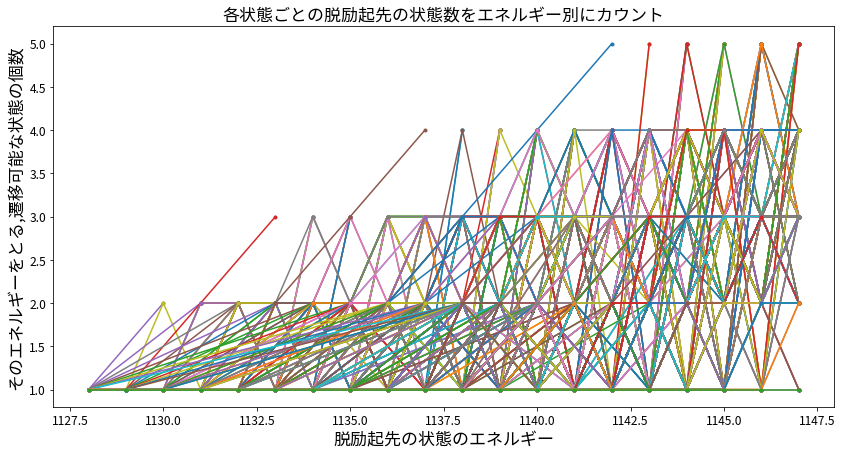

In [5]:
plt.figure(figsize=(14, 7))
for row in range(1, len(states48_15)):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    plt.plot(scores, nums, '.-', label=f"{row}番目の状態")
# plt.legend(fontsize=15)
plt.title("各状態ごとの脱励起先の状態数をエネルギー別にカウント", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる,遷移可能な状態の個数", fontsize=17)
plt.show()

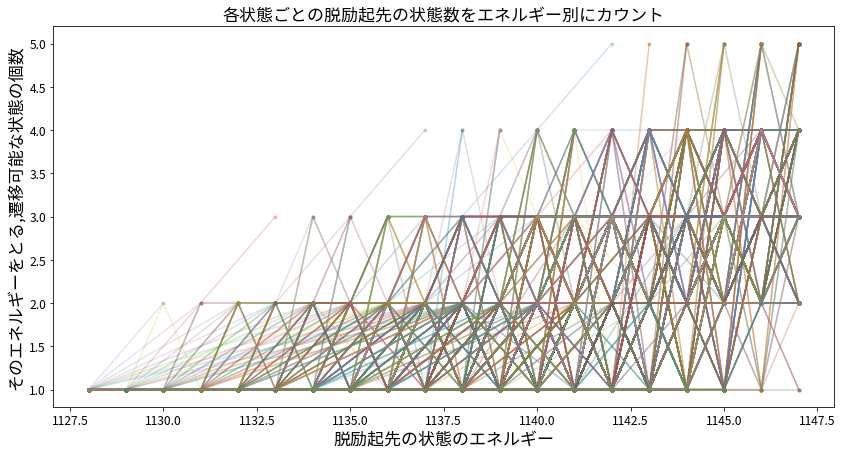

In [6]:
plt.figure(figsize=(14, 7))
for row in range(1, len(states48_15)):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    plt.plot(scores, nums, '.-', alpha=0.2)
plt.title("各状態ごとの脱励起先の状態数をエネルギー別にカウント", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる,遷移可能な状態の個数", fontsize=17)
plt.show()

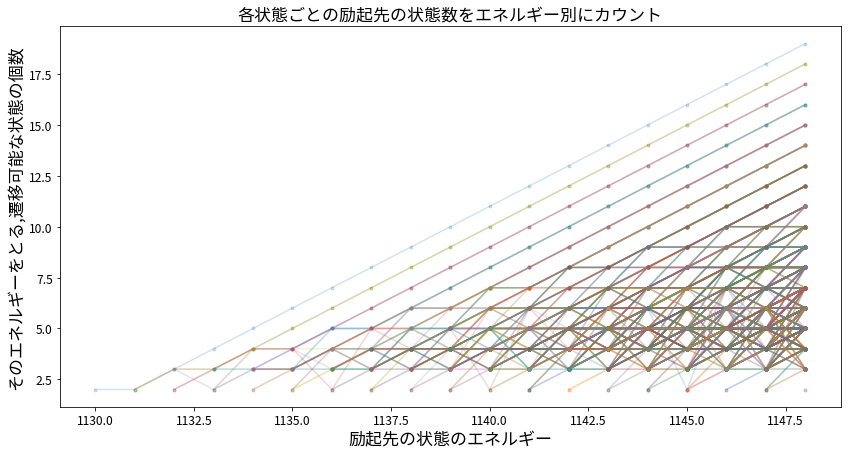

In [7]:
plt.figure(figsize=(14, 7))
for row in range(1, len(states48_15)):
    score2num = state2dct_ex[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    plt.plot(scores, nums, '.-', alpha=0.2)
plt.title("各状態ごとの励起先の状態数をエネルギー別にカウント", fontsize=17)
plt.xlabel("励起先の状態のエネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる,遷移可能な状態の個数", fontsize=17)
plt.show()

In [4]:
len(states48_15)

684

In [5]:
def calc_degeneracies(states: list[State]):
    """実際の縮退度を計算"""
    dct = {}
    for state in states:
        if dct.get(state.score):
            dct[state.score] += 1
        else:
            dct[state.score] = 1
    degeneracies = np.fromiter(dct.values(), dtype=int)
    return degeneracies

In [6]:
degeneracies48_15 = calc_degeneracies(states48_15)

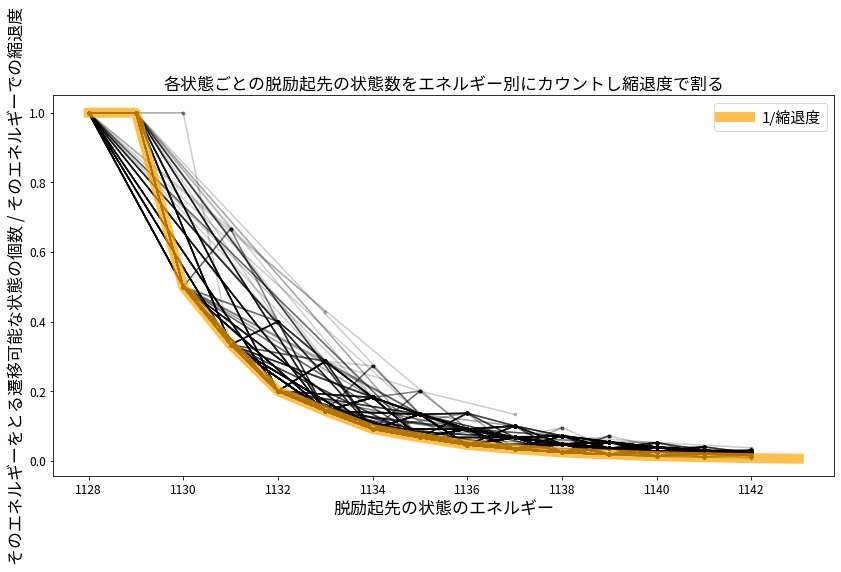

In [7]:
# 脱励起のみを考える
scores48_15 = Fermi.get_scores(states48_15)
plt.figure(figsize=(14, 7))
# for row in range(0, len(states48_15), 20):
for row in range(1, len(states48_15)):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores48_15 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies48_15, scores48_15) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="black")
plt.plot(scores48_15, 1 / degeneracies48_15, '-', linewidth=10, alpha=0.7, color="orange", label="1/縮退度")
plt.legend(fontsize=15)
plt.title("各状態ごとの脱励起先の状態数をエネルギー別にカウントし縮退度で割る", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる遷移可能な状態の個数 / そのエネルギーでの縮退度", fontsize=17)
plt.show()

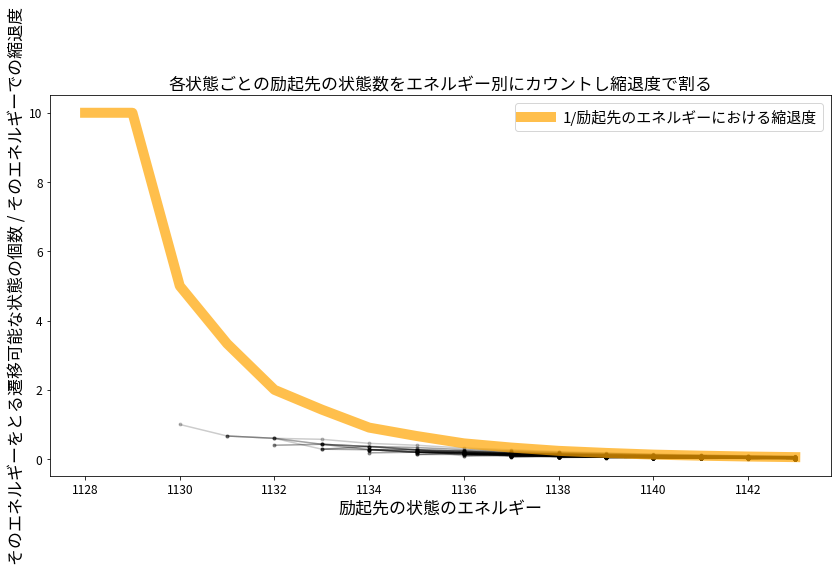

In [8]:
# 励起のみを考える
scores48_15 = Fermi.get_scores(states48_15)
plt.figure(figsize=(14, 7))
for row in range(1, len(states48_15)):
    score2num = state2dct_ex[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores48_15 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies48_15, scores48_15) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="black")
# plt.plot(np.array(scores48_15) + 2, 1 / degeneracies48_15, '-', linewidth=10, alpha=0.7, color="orange", label="1/縮退度") # ρ(E-2)dE
# plt.plot(np.array(scores48_15), 1 / degeneracies48_15, '-', linewidth=10, alpha=0.7, color="orange", label="1/励起先のエネルギーにおける縮退度")
# plt.plot(np.array(scores48_15), np.array([min(10, E - 10 * 9 / 2) for E in scores48_15]) / 2 / degeneracies48_15, '-', linewidth=10, alpha=0.7, color="orange", label="1/励起先のエネルギーにおける縮退度")
plt.plot(np.array(scores48_15), np.array([min(10, E - 10 * 9 / 2) for E in scores48_15])  / degeneracies48_15, '-', linewidth=10, alpha=0.7, color="orange", label="1/励起先のエネルギーにおける縮退度")
plt.legend(fontsize=15)
plt.title("各状態ごとの励起先の状態数をエネルギー別にカウントし縮退度で割る", fontsize=17)
plt.xlabel("励起先の状態のエネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる遷移可能な状態の個数 / そのエネルギーでの縮退度", fontsize=17)
plt.show()

* 基底状態から、その次の準位には遷移できない。

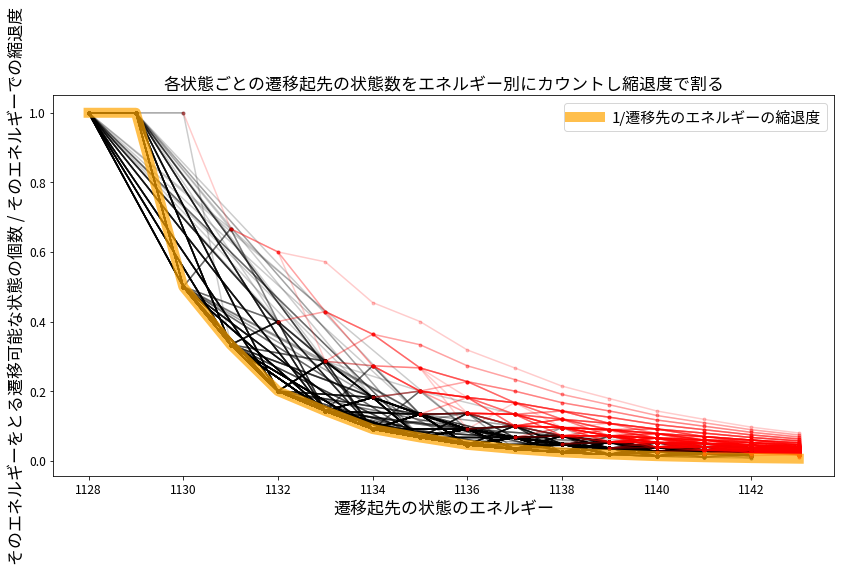

In [9]:
scores48_15 = Fermi.get_scores(states48_15)
plt.figure(figsize=(14, 7))
# for row in range(0, len(states48_15), 20):
for row in range(1, len(states48_15)):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores48_15 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies48_15, scores48_15) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="black")

for row in range(1, len(states48_15)):
    score2num = state2dct_ex[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores48_15 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies48_15, scores48_15) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="red")
plt.plot(scores48_15, 1 / degeneracies48_15, '-', linewidth=10, alpha=0.7, color="orange", label="1/遷移先のエネルギーの縮退度")
plt.legend(fontsize=15)
plt.title("各状態ごとの遷移起先の状態数をエネルギー別にカウントし縮退度で割る", fontsize=17)
plt.xlabel("遷移起先の状態のエネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる遷移可能な状態の個数 / そのエネルギーでの縮退度", fontsize=17)
plt.show()

## 遷移前も状態ではなくエネルギーごとに見る

In [10]:
def calc_degeneracy_dct(states):
    """実際の縮退度を計算"""
    dct = {}
    for state in states:
        if dct.get(state.score):
            dct[state.score] += 1
        else:
            dct[state.score] = 1
    return dct

In [11]:
degeneracy_dct = calc_degeneracy_dct(states48_15)

In [12]:
score2dct_de = calc_score2dct(states48_15, kind='deexcitation')
score2dct_ex = calc_score2dct(states48_15, kind='excitation')

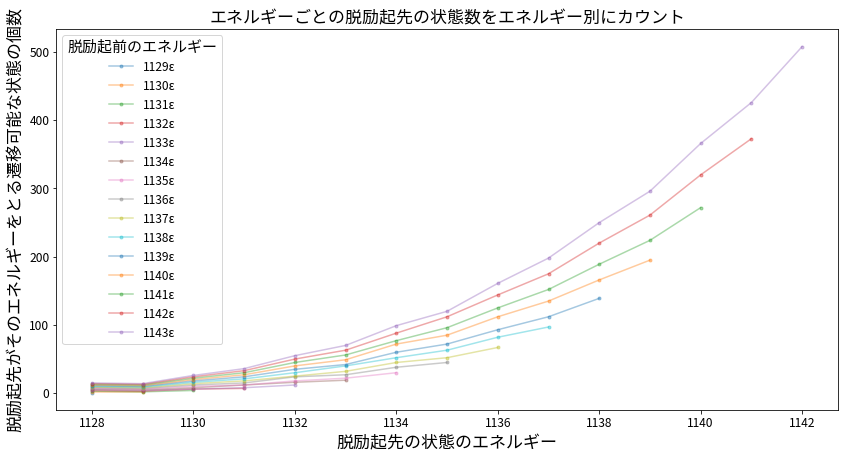

In [13]:
scores48_15 = Fermi.get_scores(states48_15)
plt.figure(figsize=(14, 7))
for score in scores48_15[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.4, label=f"{score}ε")
plt.legend(title="脱励起前のエネルギー", title_fontsize=15)
plt.title("エネルギーごとの脱励起先の状態数をエネルギー別にカウント", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("脱励起先がそのエネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

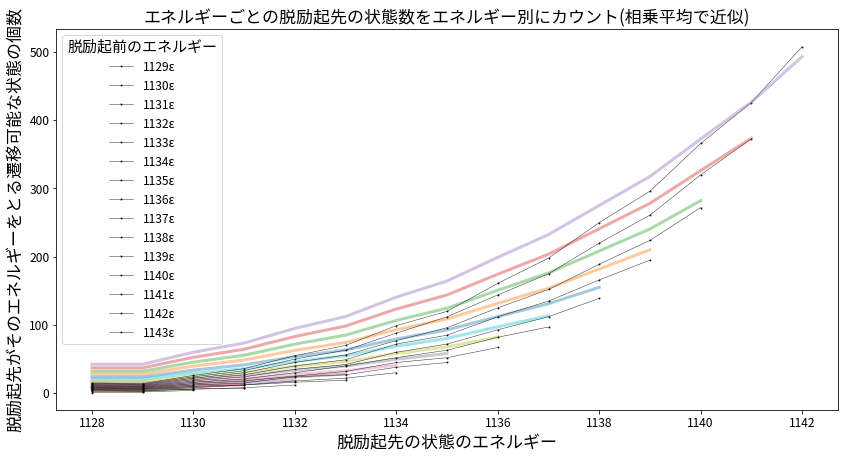

In [27]:
S = 3.2
scores48_15 = Fermi.get_scores(states48_15)
plt.figure(figsize=(14, 7))
for score in scores48_15[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    plt.plot(scores, S * (degeneracy * degeneracies48_15[:score-min(scores48_15)])**0.5, '-', alpha=0.4, linewidth=3) #
plt.legend(title="脱励起前のエネルギー", title_fontsize=15)
plt.title("エネルギーごとの脱励起先の状態数をエネルギー別にカウント(相乗平均で近似)", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("脱励起先がそのエネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

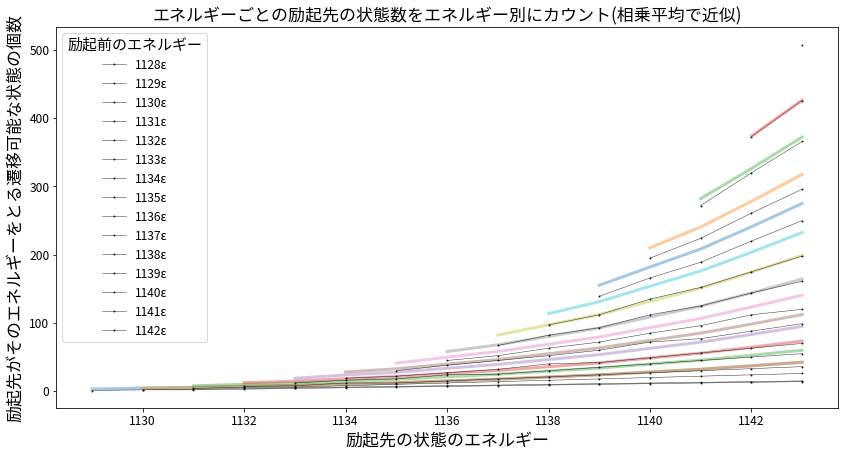

In [28]:
S = 3.2
scores48_15 = Fermi.get_scores(states48_15)
plt.figure(figsize=(14, 7))
for score in scores48_15[:-1]:
    score2num = score2dct_ex[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    plt.plot(scores, (degeneracy * degeneracies48_15[score - min(scores48_15) + 1:])**0.5 * S, '-', alpha=0.4, linewidth=3)
plt.legend(title="励起前のエネルギー", title_fontsize=15)
plt.title("エネルギーごとの励起先の状態数をエネルギー別にカウント(相乗平均で近似)", fontsize=17)
plt.xlabel("励起先の状態のエネルギー", fontsize=17)
plt.ylabel("励起先がそのエネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

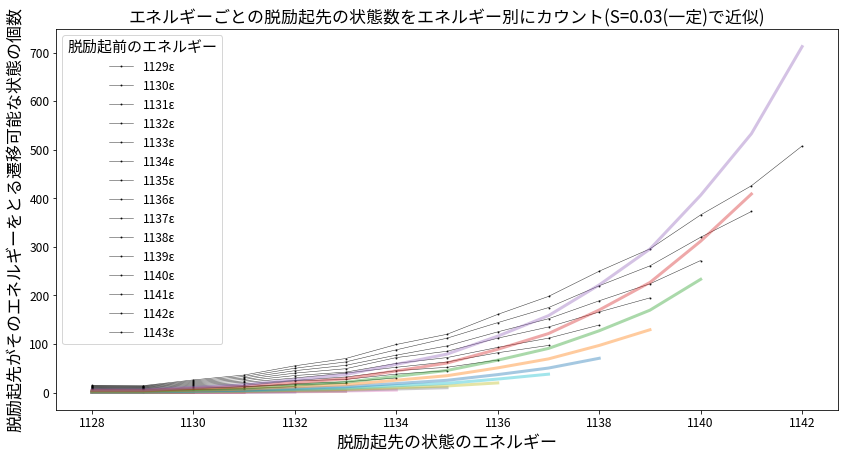

In [23]:
S = 0.03
scores48_15 = Fermi.get_scores(states48_15)
plt.figure(figsize=(14, 7))
for score in scores48_15[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    # plt.plot(scores, nums, '.-', alpha=0.5, label=f"{score}ε")
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    plt.plot(scores, degeneracy * degeneracies48_15[:score-min(scores48_15)] * S, '-', alpha=0.4, linewidth=3)
plt.legend(title="脱励起前のエネルギー", title_fontsize=15, loc="upper left")
plt.title(f"エネルギーごとの脱励起先の状態数をエネルギー別にカウント(S={S}(一定)で近似)", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("脱励起先がそのエネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

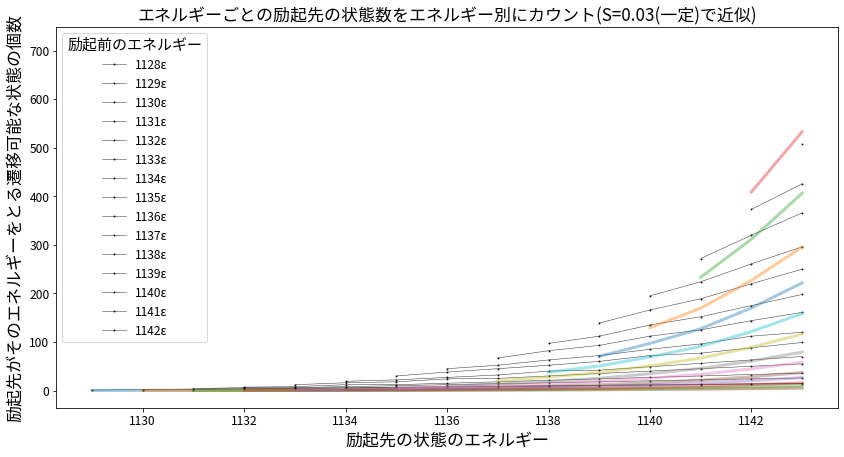

In [24]:
S = 0.03
scores48_15 = Fermi.get_scores(states48_15)
plt.figure(figsize=(14, 7))
for score in scores48_15[:-1]:
    score2num = score2dct_ex[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    plt.plot(scores, degeneracy * degeneracies48_15[score - min(scores48_15) + 1:] * S, '-', alpha=0.4, linewidth=3)
plt.legend(title="励起前のエネルギー", title_fontsize=15)
plt.title(f"エネルギーごとの励起先の状態数をエネルギー別にカウント(S={S}(一定)で近似)", fontsize=17)
plt.xlabel("励起先の状態のエネルギー", fontsize=17)
plt.ylabel("励起先がそのエネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

縮退度で割るのではなく、全ルート数で割る(遷移前の状態数 × 遷移後の状態数)

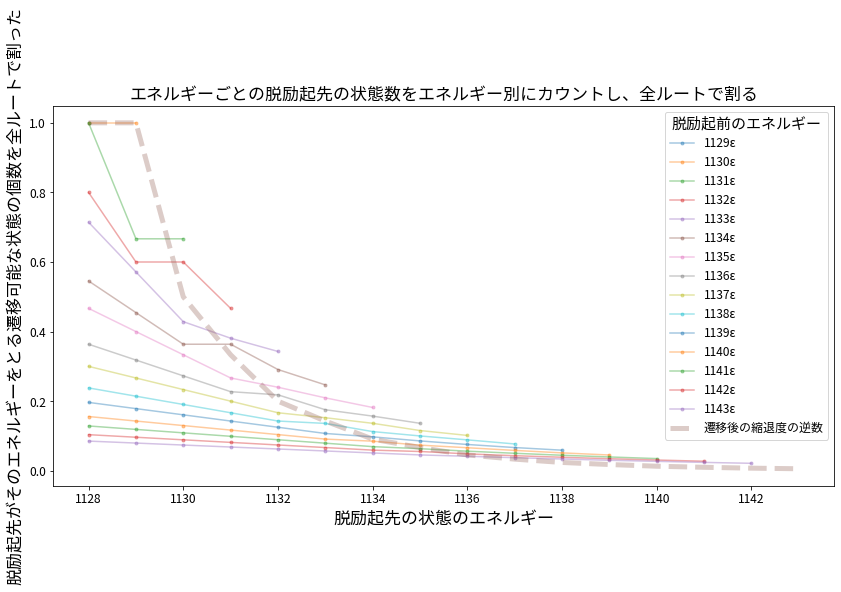

In [18]:
scores48_15 = Fermi.get_scores(states48_15)
plt.figure(figsize=(14, 7))
for score in scores48_15[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums / (degeneracy * degeneracies48_15[:score - min(scores48_15)]), '.-', alpha=0.4, label=f"{score}ε")
    # plt.plot(scores, nums, '.-', alpha=0.4, label=f"{score}ε")
plt.plot(scores48_15, 1/degeneracies48_15, '--', alpha=0.3, linewidth=5, label="遷移後の縮退度の逆数")
plt.legend(title="脱励起前のエネルギー", title_fontsize=15)

plt.title("エネルギーごとの脱励起先の状態数をエネルギー別にカウントし、全ルートで割る", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("脱励起先がそのエネルギーをとる遷移可能な状態の個数を全ルートで割った", fontsize=17)
plt.show()

In [23]:
1.60217662e-38 * 0.01 * 0.53e-10

8.491536085999999e-51

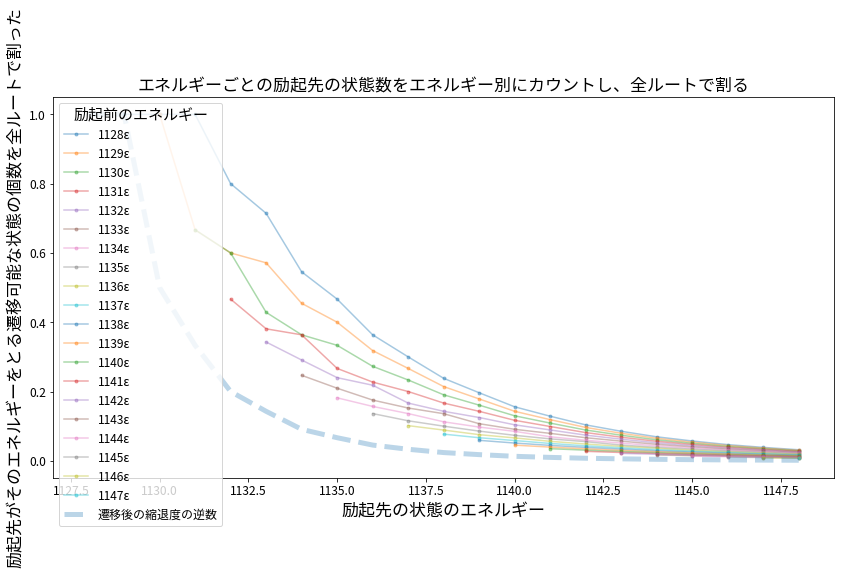

In [24]:
scores48_15 = Fermi.get_scores(states48_15)
plt.figure(figsize=(14, 7))
for score in scores48_15[:-1]:
    score2num = score2dct_ex[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums / (degeneracy * degeneracies48_15[score - min(scores48_15) + 1:]), '.-', alpha=0.4, label=f"{score}ε")
plt.plot(scores48_15, 1/degeneracies48_15, '--', alpha=0.3, linewidth=5, label="遷移後の縮退度の逆数")
plt.legend(title="励起前のエネルギー", title_fontsize=15)
plt.title("エネルギーごとの励起先の状態数をエネルギー別にカウントし、全ルートで割る", fontsize=17)
plt.xlabel("励起先の状態のエネルギー", fontsize=17)
plt.ylabel("励起先がそのエネルギーをとる遷移可能な状態の個数を全ルートで割った", fontsize=17)
plt.show()

In [47]:
score2dct_de

{46: {45: 1},
 47: {45: 2, 46: 2},
 48: {45: 3, 46: 2, 47: 4},
 49: {45: 4, 46: 3, 47: 6, 48: 7},
 50: {45: 5, 46: 4, 47: 6, 48: 8, 49: 12},
 51: {45: 6, 46: 5, 47: 8, 48: 12, 49: 16, 50: 19},
 52: {45: 7, 46: 6, 47: 10, 48: 12, 49: 18, 50: 22, 51: 30},
 53: {45: 8, 46: 7, 47: 12, 48: 15, 49: 24, 50: 27, 51: 38, 52: 45},
 54: {45: 9, 46: 8, 47: 14, 48: 18, 49: 25, 50: 32, 51: 45, 52: 52, 53: 67},
 55: {45: 10,
  46: 9,
  47: 16,
  48: 21,
  49: 30,
  50: 40,
  51: 52,
  52: 63,
  53: 82,
  54: 97},
 56: {45: 10,
  46: 9,
  47: 17,
  48: 23,
  49: 34,
  50: 41,
  51: 59,
  52: 71,
  53: 92,
  54: 111,
  55: 138},
 57: {45: 10,
  46: 10,
  47: 18,
  48: 25,
  49: 38,
  50: 47,
  51: 70,
  52: 83,
  53: 110,
  54: 133,
  55: 164,
  56: 192},
 58: {45: 10,
  46: 10,
  47: 19,
  48: 27,
  49: 41,
  50: 52,
  51: 73,
  52: 92,
  53: 121,
  54: 148,
  55: 185,
  56: 218,
  57: 265},
 59: {45: 10,
  46: 10,
  47: 20,
  48: 28,
  49: 44,
  50: 57,
  51: 81,
  52: 105,
  53: 137,
  54: 168,
  55

In [31]:
# sum_matrix = np.sum(adj, axis=1)

def foo(states):
    # dct = {エネルギー: 遷移可能なルート数}
    num_states = len(states)
    dct = dict()
    for i in range(1, num_states):
        for j in range(0, i):
            if Fermi.is_connected(states[i], states[j]):
                score = states[j].score
                if dct.get(score):
                    dct[score] += 1
                else:
                    dct[score] = 1
    return dct

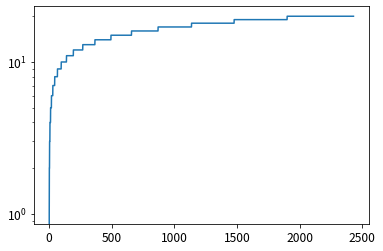

In [30]:
plt.plot(np.arange(0, adj.shape[0]), sum_matrix)
plt.yscale("log")
plt.show()

In [32]:
score2transitionable_num = foo(states48_15)

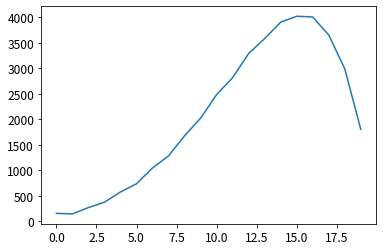

In [52]:
scores = np.fromiter(score2transitionable_num.keys(), dtype=int)
transitionable_nums = np.fromiter(score2transitionable_num.values(), dtype=int)
plt.plot(scores - scores[0], transitionable_nums)
# plt.yscale("log")
plt.show()